In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Specify the correct path to the CSV file with the name of the CSV file
dataset_path = "../data/merged_dataset.csv"

# Load the dataset into a pandas DataFrame
df = pd.read_csv(dataset_path)


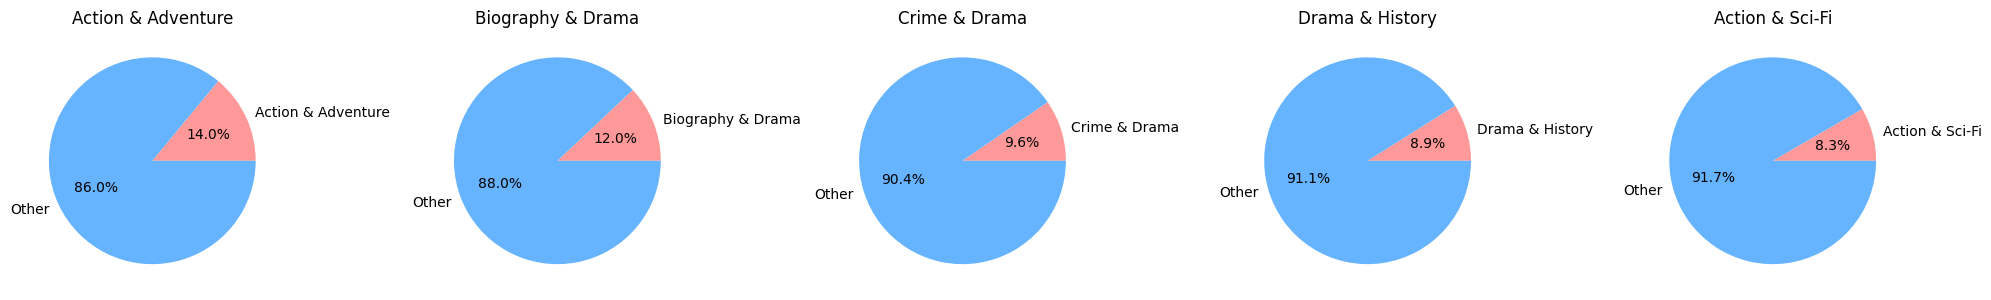

In [2]:
# Cleaning genres column
df["genres"] = df["genres"].str.replace(";", "").str.split() #clean the columns by removing the semicolors between the genres and splitting it into lists

# Create a dictionary to count genre pair occurrences
from collections import Counter
from itertools import combinations #create all possible pairs of genres per movie

genre_pairs = Counter() #count how often each pair appears using "counter"

for genres in df["genres"]:
    for pair in combinations(genres, 2):  # Create all 2-genre combinations
        genre_pairs[pair] += 1

# Convert to DataFrame
genre_pairs_df = pd.DataFrame(genre_pairs.items(), columns=["Genre Pair", "Count"]).sort_values(by="Count", ascending=False) # show the most frequent genre combinations

# Plot Pie Charts for the top 5 most common genre pairs, for eacg pair there will be a pie chart
top_genre_pairs = genre_pairs_df.head(5)

fig, axes = plt.subplots(1, 5, figsize=(20, 5))

for i, (pair, count) in enumerate(zip(top_genre_pairs["Genre Pair"], top_genre_pairs["Count"])):
    labels = [f"{pair[0]} & {pair[1]}", "Other"]
    sizes = [count, df.shape[0] - count]  # Other movies without this combination
    axes[i].pie(sizes, labels=labels, autopct="%1.1f%%", colors=["#ff9999", "#66b3ff"])
    axes[i].set_title(f"{pair[0]} & {pair[1]}")

plt.tight_layout()
plt.show()

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from itertools import combinations

# Clean the genres column
df["genres"] = df["genres"].str.replace(";", "").str.split()

# Count occurrences of genre pairs
genre_pairs = Counter()

for genres in df["genres"]:
    for pair in combinations(genres, 2):  # Get all 2-genre combinations
        genre_pairs[pair] += 1

# Convert to DataFrame and sort
genre_pairs_df = pd.DataFrame(genre_pairs.items(), columns=["Genre Pair", "Count"]).sort_values(by="Count", ascending=False)

# Choose how many genre pairs to show (adjust as needed)
num_pairs_to_show = 10
top_genre_pairs = genre_pairs_df.head(num_pairs_to_show)

# Create a single pie chart for all selected genre pairs
labels = [f"{pair[0]} & {pair[1]}" for pair in top_genre_pairs["Genre Pair"]]
sizes = top_genre_pairs["Count"]

# Add "Other" category for the remaining combinations
other_count = genre_pairs_df["Count"].sum() - sizes.sum()
labels.append("Other")
sizes = list(sizes) + [other_count]

# Plot the pie chart
plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", colors=plt.cm.Paired.colors)
plt.title(f"Top {num_pairs_to_show} Genre Combinations in Movies")
plt.show()

AttributeError: Can only use .str accessor with string values!

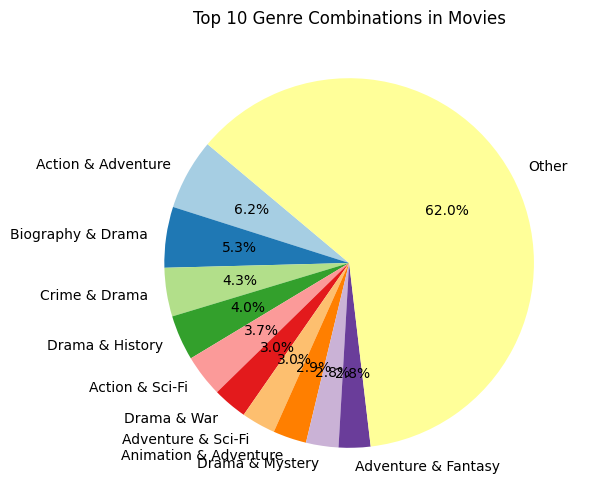

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from itertools import combinations



# Count occurrences of genre pairs
genre_pairs = Counter()

for genres in df["genres"]:
    for pair in combinations(genres, 2):  # Get all 2-genre combinations
        genre_pairs[pair] += 1

# Convert to DataFrame and sort
genre_pairs_df = pd.DataFrame(genre_pairs.items(), columns=["Genre Pair", "Count"]).sort_values(by="Count", ascending=False)

# Choose how many genre pairs to show (adjust as needed)
num_pairs_to_show = 10
top_genre_pairs = genre_pairs_df.head(num_pairs_to_show)

# Prepare labels and sizes for pie chart
labels = [f"{pair[0]} & {pair[1]}" for pair in top_genre_pairs["Genre Pair"]]
sizes = top_genre_pairs["Count"].tolist()

# Add "Other" category for the remaining combinations
other_count = genre_pairs_df["Count"].sum() - sum(sizes)
labels.append("Other")
sizes.append(other_count)

# Plot the pie chart
plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", colors=plt.cm.Paired.colors, startangle=140)
plt.title(f"Top {num_pairs_to_show} Genre Combinations in Movies")
plt.show()